# 卷及神经网络的可视化
* 可视化卷积神经网络的中间激活
* 可视化卷积神经网络的过滤器
* 可视化卷积神经网络的热力图

## NO.1-可视化中间激活

In [14]:
# 加载模型
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

## 预处理输入图像

In [15]:
image_path = '/Users/fchollet/Downloads/cats_and_dogs_small/test/cats/cat.1500.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(image_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


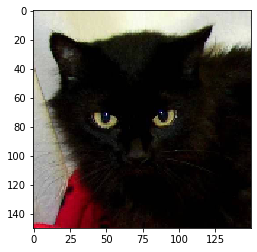

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

## 新建一个模型

In [17]:
from keras import models

# 提取前8层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]

# 创建一个模型，给定模型输入，可以返回一些输出
activation_model = models.Model(inputs = model.input, outputs=layer_outputs)

# 以预测模式运行模型
activations = activation_model.predict(img_tensor)

## 将第1个卷积层第4个通道可视化

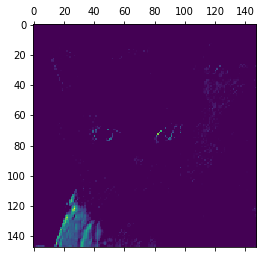

In [18]:
first_layer_activation = activations[0]

plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

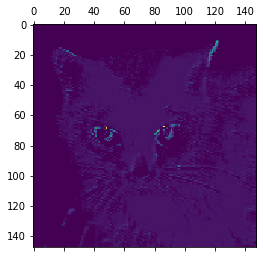

In [19]:
plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')

## 将每个中间激活（输出）的所有通道可视化

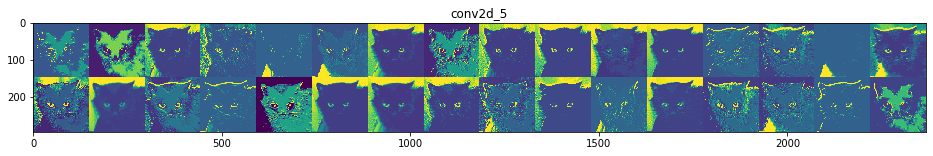

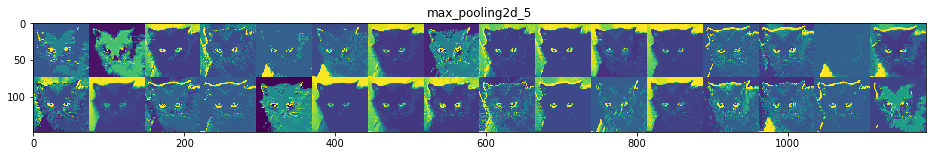

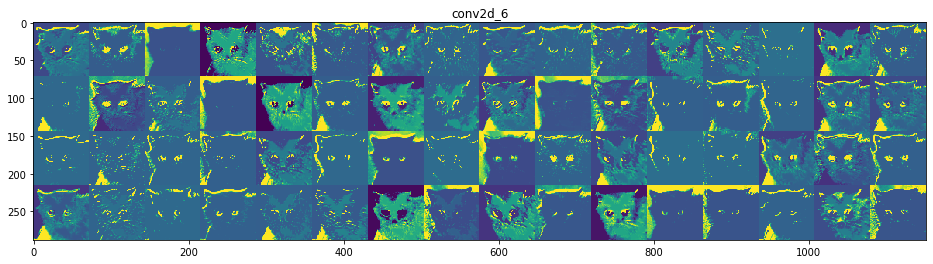

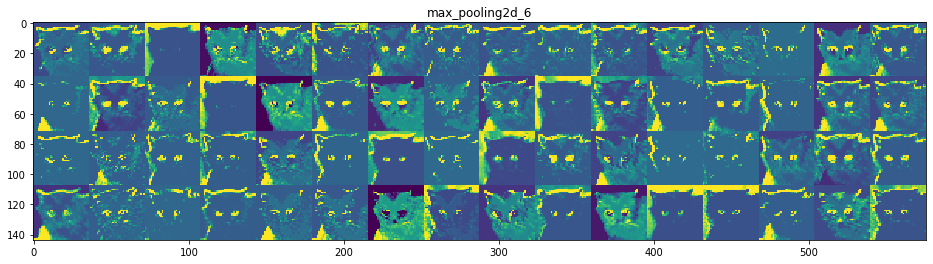

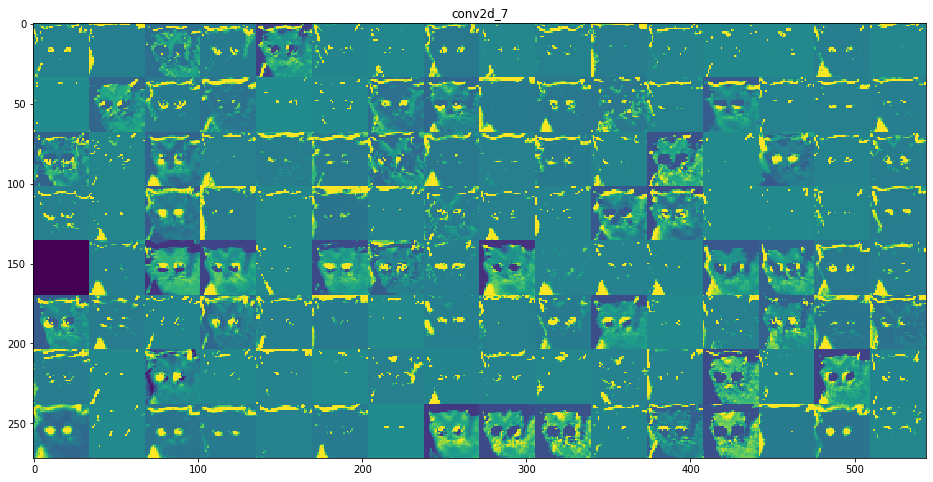

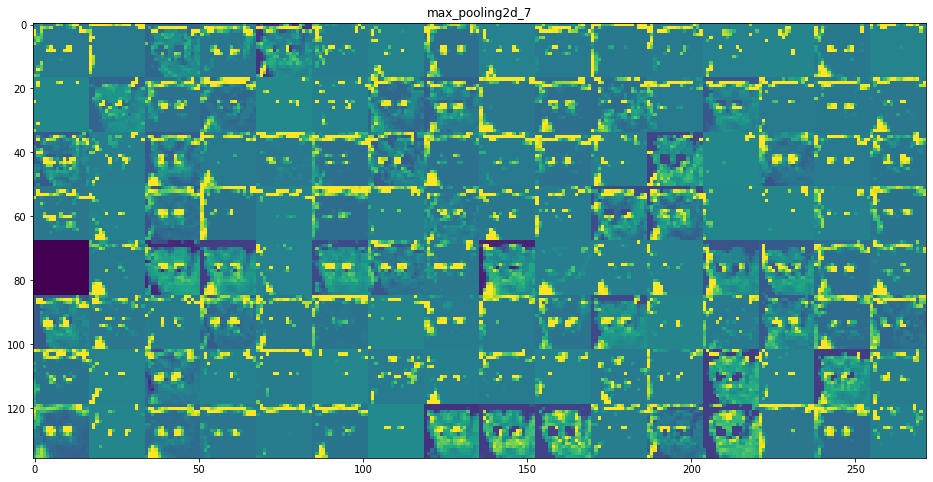

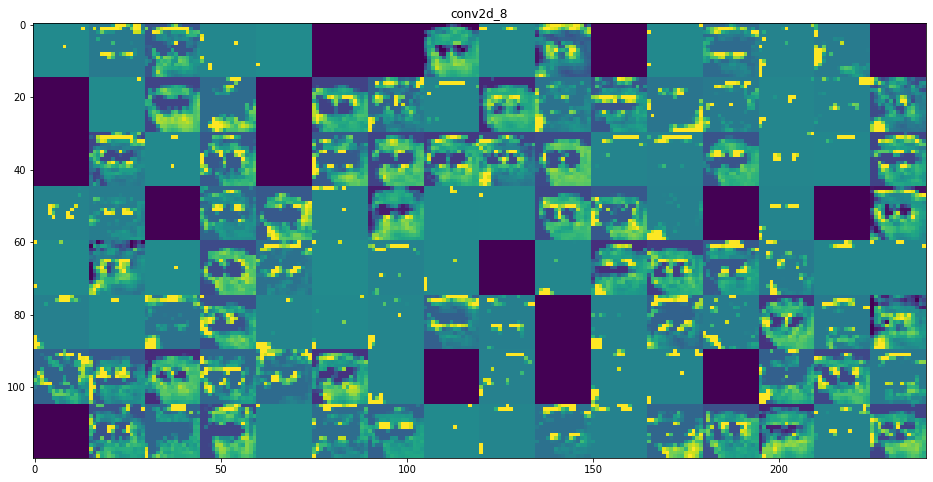

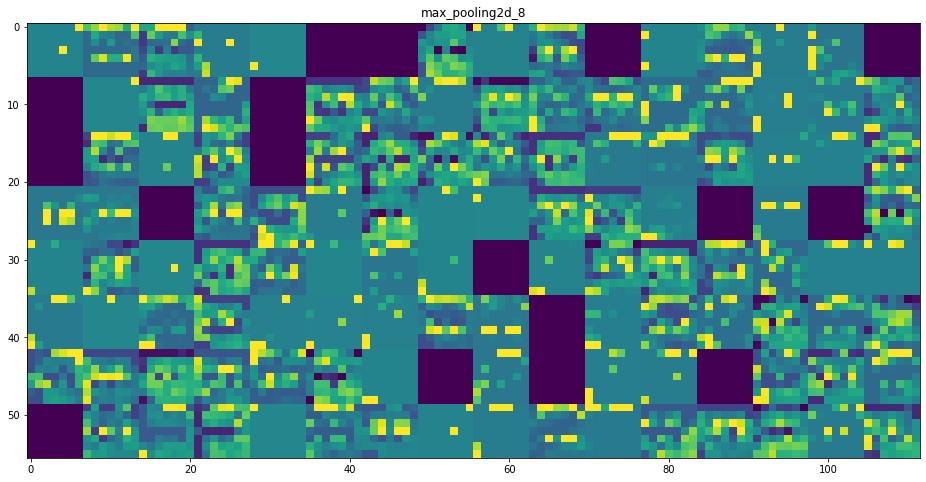

In [24]:
# 层的名称
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]   # 特征图中的特征个数
    
    size = layer_activation.shape[1]          # 特征图的形状为(1, size, size, n_features)
    
    n_cols = n_features // images_per_row     # 在这个矩阵中将激活通道平铺
    display_gird = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col*images_per_row+row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_gird[col*size : (col+1)*size,  # 显示网格
                         row*size : (row+1)*size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale*display_gird.shape[1],
                        scale*display_gird.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_gird, aspect='auto', cmap='viridis')

## NO.2可视化卷积神经网络的过滤器